<div class="alert alert-block alert-success">
    <b><center>DEEP NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from ipywidgets import interact

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers, metrics, callbacks

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.4.1'

# Prepare Data

In [5]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = tf.keras.datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Analysis Datas

In [6]:
@interact(idx=(0, 60000))
def showImage(idx):
    plt.imshow(trainDatas[idx], cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL : {trainLabels[idx]}")
    plt.show()

interactive(children=(IntSlider(value=30000, description='idx', max=60000), Output()), _dom_classes=('widget-i…

In [7]:
trainDatas[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

# Preprocessing Data

In [8]:
# 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28*28)
testDatas = testDatas.reshape(-1, 28*28)

trainDatas.shape, testDatas.shape

((60000, 784), (10000, 784))

In [9]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [10]:
model = models.Sequential([
    layers.Input([784]),
    layers.Dense(256, activation=tf.keras.activations.relu),
#     layers.Dropout(0.2),
    layers.Dense(10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


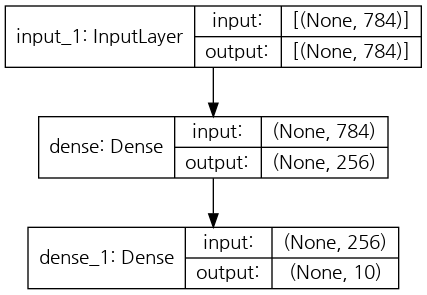

In [11]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [12]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics = [metrics.CategoricalAccuracy()]
)

# Training

In [13]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
48/48 [==============================] - 1s 13ms/step - loss: 80.7868 - categorical_accuracy: 0.2553 - val_loss: 15.4204 - val_categorical_accuracy: 0.6811
Epoch 2/20
48/48 [==============================] - 0s 3ms/step - loss: 13.1285 - categorical_accuracy: 0.7195 - val_loss: 8.2903 - val_categorical_accuracy: 0.8020
Epoch 3/20
48/48 [==============================] - 0s 3ms/step - loss: 7.8707 - categorical_accuracy: 0.8105 - val_loss: 6.2297 - val_categorical_accuracy: 0.8459
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 6.0384 - categorical_accuracy: 0.8486 - val_loss: 5.2050 - val_categorical_accuracy: 0.8634
Epoch 5/20
48/48 [==============================] - 0s 3ms/step - loss: 4.6333 - categorical_accuracy: 0.8724 - val_loss: 4.5225 - val_categorical_accuracy: 0.8763
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 4.0299 - categorical_accuracy: 0.8839 - val_loss: 4.0641 - val_categorical_accuracy: 0.8849
Epoch 7/20
4

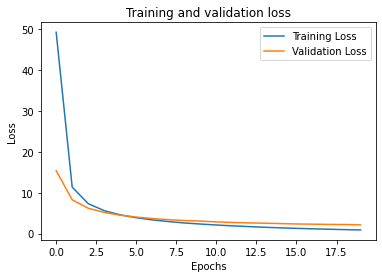

In [14]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [15]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels,verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(1.9682170152664185, '92.63 %')

# Predict

In [16]:
@interact(idx=(0, 10000))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 784)
    dataPred = model.predict(data)

    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…